# Stochastic Gradient Descent (SGD)

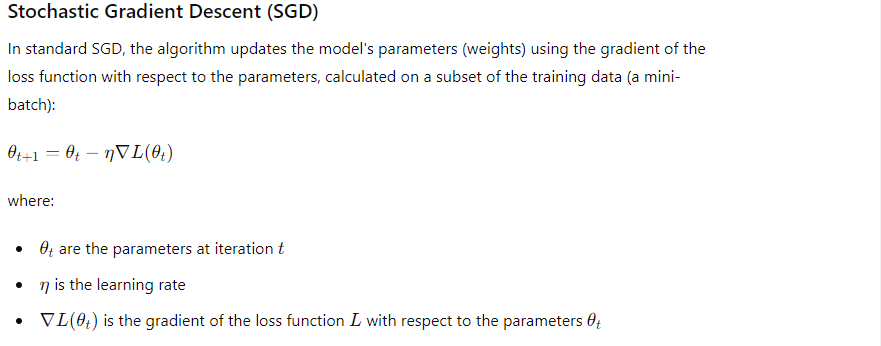
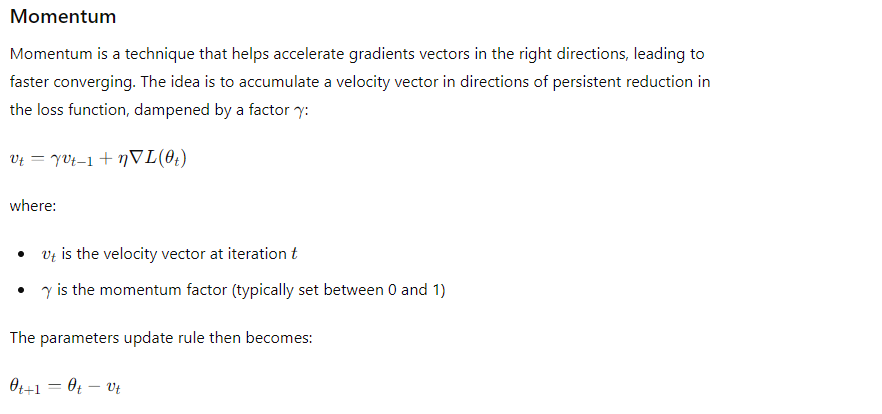
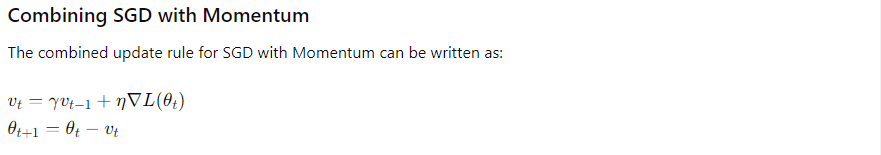

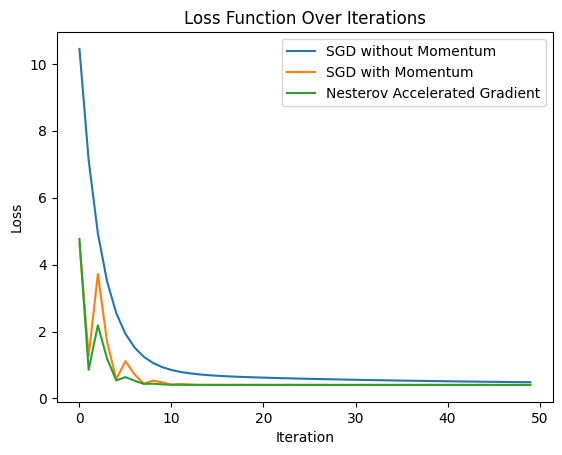

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Prepare the data by adding a bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_basic = np.random.randn(2, 1)  # Random initialization for weights and bias
theta_momentum = np.random.randn(2, 1)  # Random initialization for weights and bias

# Initialize parameters
theta_nag = np.random.randn(2, 1)  # Random initialization for weights and bias

# Define the Loss Function
def compute_loss(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    loss = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return loss

# Implement the basic SGD Algorithm without Momentum
def sgd_basic(X_b, y, theta, learning_rate=0.01, n_iterations=50, batch_size=20):
    m = len(y)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the SGD Algorithm with Momentum
def sgd_momentum(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            velocity = momentum * velocity + learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history


# Implement the Nesterov Accelerated Gradient Algorithm
def sgd_nag(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Lookahead step
            lookahead_theta = theta - momentum * velocity
            gradients = 2 / batch_size * xi.T.dot(xi.dot(lookahead_theta) - yi)
            velocity = momentum * velocity + learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history



# Train the model using basic SGD
theta, loss_history_basic = sgd_basic(X_b, y, theta_basic, learning_rate=0.01, n_iterations=50, batch_size=20)

# Train the model using SGD with momentum
theta, loss_history_momentum = sgd_momentum(X_b, y, theta_basic, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20)

# Train the model using Nesterov Accelerated Gradient
theta, loss_history_nag = sgd_nag(X_b, y, theta_basic, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20)

# Plot the Loss Function
plt.plot(loss_history_basic, label='SGD without Momentum')
plt.plot(loss_history_momentum, label='SGD with Momentum')
plt.plot(loss_history_nag, label='Nesterov Accelerated Gradient')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations')
plt.legend()
plt.show()


# Nesterov Accelerated Gradient Implementation

Estimated parameters (weights and bias) using NAG: [[4.20941281]
 [2.77143494]]


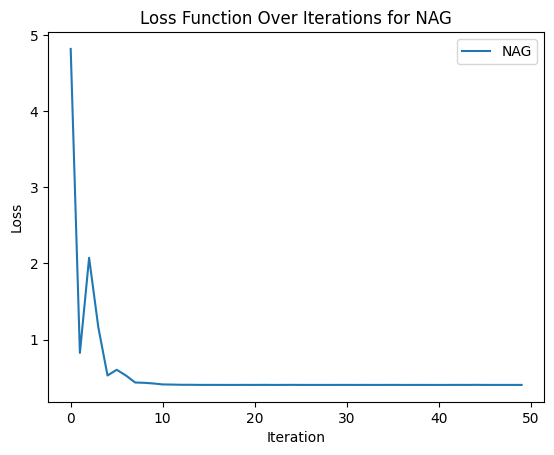

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Prepare the data by adding a bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_nag = np.random.randn(2, 1)  # Random initialization for weights and bias

# Define the Loss Function
def compute_loss(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    loss = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return loss

# Implement the Nesterov Accelerated Gradient Algorithm
def sgd_nag(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Lookahead step
            lookahead_theta = theta - momentum * velocity
            gradients = 2 / batch_size * xi.T.dot(xi.dot(lookahead_theta) - yi)
            velocity = momentum * velocity + learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Train the model using Nesterov Accelerated Gradient
theta_nag, loss_history_nag = sgd_nag(X_b, y, theta_nag, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20)

# Print the estimated parameters
print("Estimated parameters (weights and bias) using NAG:", theta_nag)

# Plot the Loss Function
plt.plot(loss_history_nag, label='NAG')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations for NAG')
plt.legend()
plt.show()


# Comparision of all weight optimizer

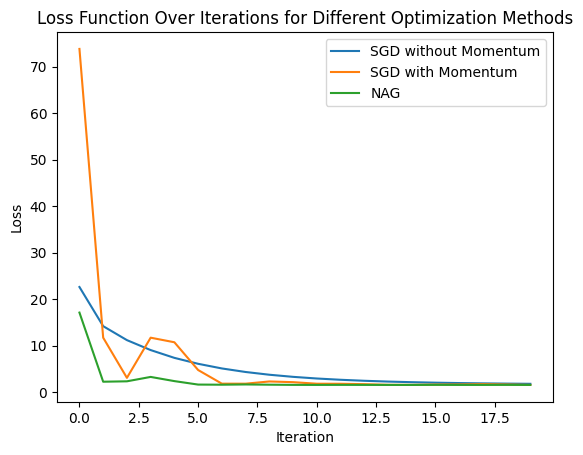

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more complex synthetic data
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X3 = 5 * np.random.rand(100, 1)

# Create a non-linear relationship
y = 4 + 3 * X1 + 2 * np.square(X2) + 1.5 * np.sin(X3) + np.random.randn(100, 1)

# Combine features into a single dataset
X = np.c_[X1, X2, X3]

# Prepare the data by adding a bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_sgd = np.random.randn(X_b.shape[1], 1)  # For basic SGD
theta_momentum = np.random.randn(X_b.shape[1], 1)  # For SGD with Momentum
theta_nag = np.random.randn(X_b.shape[1], 1)  # For NAG

# Define the Loss Function
def compute_loss(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    loss = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return loss

# Implement the basic SGD Algorithm without Momentum
def sgd_basic(X_b, y, theta, learning_rate=0.01, n_iterations=50, batch_size=20):
    m = len(y)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the SGD Algorithm with Momentum
def sgd_momentum(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            velocity = momentum * velocity + learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the Nesterov Accelerated Gradient Algorithm
def sgd_nag(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Lookahead step
            lookahead_theta = theta - momentum * velocity
            gradients = 2 / batch_size * xi.T.dot(xi.dot(lookahead_theta) - yi)
            velocity = momentum * velocity + learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Train the model using basic SGD
theta_sgd, loss_history_sgd = sgd_basic(X_b, y, theta_sgd, learning_rate=0.01, n_iterations=20, batch_size=20)

# Train the model using SGD with momentum
theta_momentum, loss_history_momentum = sgd_momentum(X_b, y, theta_momentum, learning_rate=0.01, momentum=0.9, n_iterations=20, batch_size=20)

# Train the model using Nesterov Accelerated Gradient
theta_nag, loss_history_nag = sgd_nag(X_b, y, theta_nag, learning_rate=0.01, momentum=0.9, n_iterations=20, batch_size=20)

# Plot the Loss Function
plt.plot(loss_history_sgd, label='SGD without Momentum')
plt.plot(loss_history_momentum, label='SGD with Momentum')
plt.plot(loss_history_nag, label='NAG')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations for Different Optimization Methods')
plt.legend()
plt.show()



# Adagrad Implementation

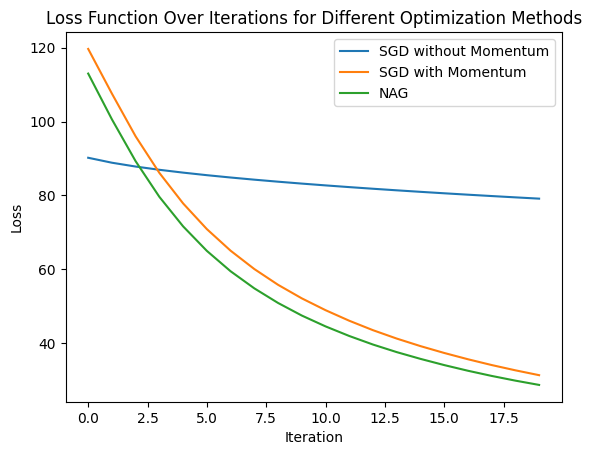

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more complex synthetic data
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X3 = 5 * np.random.rand(100, 1)

# Create a non-linear relationship
y = 4 + 3 * X1 + 2 * np.square(X2) + 1.5 * np.sin(X3) + np.random.randn(100, 1)

# Combine features into a single dataset
X = np.c_[X1, X2, X3]

# Prepare the data by adding a bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_sgd = np.random.randn(X_b.shape[1], 1)  # For basic SGD
theta_momentum = np.random.randn(X_b.shape[1], 1)  # For SGD with Momentum
theta_nag = np.random.randn(X_b.shape[1], 1)  # For NAG

# Define the Loss Function
def compute_loss(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    loss = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return loss

# Implement the basic SGD Algorithm without Momentum
def sgd_basic(X_b, y, theta, learning_rate=0.01, n_iterations=50, batch_size=20, epsilon=1e-8):
    m = len(y)
    loss_history = []
    G = np.zeros_like(theta)

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            G += gradients ** 2
            adagrad_learning_rate = learning_rate / (np.sqrt(G) + epsilon)
            theta = theta - adagrad_learning_rate * gradients


        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the SGD Algorithm with Momentum
def sgd_momentum(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20, epsilon=1e-8):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []
    G = np.zeros_like(theta)

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            G += gradients ** 2
            adagrad_learning_rate = learning_rate / (np.sqrt(G) + epsilon)
            velocity = momentum * velocity + adagrad_learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the Nesterov Accelerated Gradient Algorithm
def sgd_nag(X_b, y, theta, learning_rate=0.01, momentum=0.9, n_iterations=50, batch_size=20, epsilon=1e-8):
    m = len(y)
    velocity = np.zeros_like(theta)
    loss_history = []
    G = np.zeros_like(theta)

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Lookahead step
            lookahead_theta = theta - momentum * velocity
            gradients = 2 / batch_size * xi.T.dot(xi.dot(lookahead_theta) - yi)
            G += gradients ** 2
            adagrad_learning_rate = learning_rate / (np.sqrt(G) + epsilon)
            velocity = momentum * velocity + adagrad_learning_rate * gradients
            theta = theta - velocity

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Train the model using basic SGD
theta_sgd, loss_history_sgd = sgd_basic(X_b, y, theta_sgd, learning_rate=0.01, n_iterations=20, batch_size=20)

# Train the model using SGD with momentum
theta_momentum, loss_history_momentum = sgd_momentum(X_b, y, theta_momentum, learning_rate=0.01, momentum=0.9, n_iterations=20, batch_size=20)

# Train the model using Nesterov Accelerated Gradient
theta_nag, loss_history_nag = sgd_nag(X_b, y, theta_nag, learning_rate=0.01, momentum=0.9, n_iterations=20, batch_size=20)

# Plot the Loss Function
plt.plot(loss_history_sgd, label='SGD without Momentum')
plt.plot(loss_history_momentum, label='SGD with Momentum')
plt.plot(loss_history_nag, label='NAG')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations for Different Optimization Methods')
plt.legend()
plt.show()



# Implementing Adadelta , RMSProp and Adam with basic SGD

Estimated parameters (weights and bias) using Adadelta: [[1.07347179]
 [0.3543314 ]
 [1.9268577 ]
 [0.84781017]]
Estimated parameters (weights and bias) using RMSProp: [[1.5178468 ]
 [2.01065028]
 [2.7962321 ]
 [1.46987501]]
Estimated parameters (weights and bias) using Adam: [[-0.67019264]
 [ 0.39419338]
 [ 0.39510638]
 [-0.35601318]]


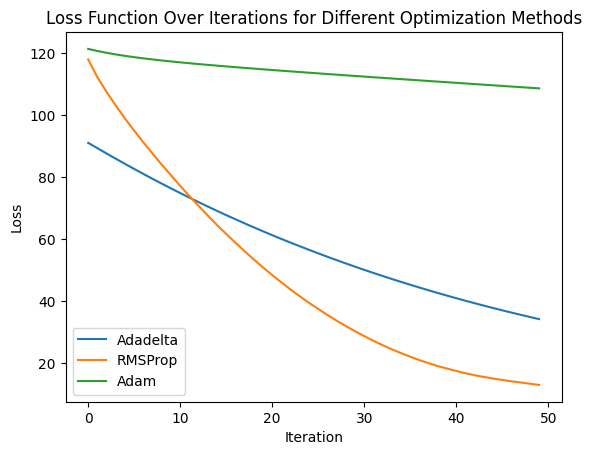

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more complex synthetic data
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X3 = 5 * np.random.rand(100, 1)

# Create a non-linear relationship
y = 4 + 3 * X1 + 2 * np.square(X2) + 1.5 * np.sin(X3) + np.random.randn(100, 1)

# Combine features into a single dataset
X = np.c_[X1, X2, X3]

# Prepare the data by adding a bias term
X_b = np.c_[np.ones((100, 1)), X]

# Define the Loss Function
def compute_loss(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    loss = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return loss

# Implement the Adadelta Algorithm
def sgd_adadelta(X_b, y, theta, learning_rate=0.01, rho=0.95, epsilon=1e-6, n_iterations=50, batch_size=20):
    m = len(y)
    Eg2 = np.zeros_like(theta)
    Edelta_theta2 = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            Eg2 = rho * Eg2 + (1 - rho) * gradients ** 2
            delta_theta = - (np.sqrt(Edelta_theta2 + epsilon) / np.sqrt(Eg2 + epsilon)) * gradients
            theta += delta_theta
            Edelta_theta2 = rho * Edelta_theta2 + (1 - rho) * delta_theta ** 2

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the RMSProp Algorithm
def sgd_rmsprop(X_b, y, theta, learning_rate=0.01, beta=0.9, epsilon=1e-8, n_iterations=50, batch_size=20):
    m = len(y)
    Eg2 = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            Eg2 = beta * Eg2 + (1 - beta) * gradients ** 2
            theta = theta - learning_rate * gradients / (np.sqrt(Eg2) + epsilon)

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Implement the Adam Algorithm
def sgd_adam(X_b, y, theta, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iterations=50, batch_size=20):
    m = len(y)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    loss_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * gradients
            v_t = beta2 * v_t + (1 - beta2) * gradients ** 2

            m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
            v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

            theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

        # Record the loss after each iteration
        loss = compute_loss(X_b, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Initialize parameters
theta_adadelta = np.random.randn(X_b.shape[1], 1)  # For Adadelta
theta_rmsprop = np.random.randn(X_b.shape[1], 1)  # For RMSProp
theta_adam = np.random.randn(X_b.shape[1], 1)  # For Adam

# Train the model using Adadelta
theta_adadelta, loss_history_adadelta = sgd_adadelta(X_b, y, theta_adadelta, learning_rate=0.01, n_iterations=50, batch_size=20)

# Train the model using RMSProp
theta_rmsprop, loss_history_rmsprop = sgd_rmsprop(X_b, y, theta_rmsprop, learning_rate=0.01, n_iterations=50, batch_size=20)

# Train the model using Adam
theta_adam, loss_history_adam = sgd_adam(X_b, y, theta_adam, learning_rate=0.001, n_iterations=50, batch_size=20)

# Print the estimated parameters
print("Estimated parameters (weights and bias) using Adadelta:", theta_adadelta)
print("Estimated parameters (weights and bias) using RMSProp:", theta_rmsprop)
print("Estimated parameters (weights and bias) using Adam:", theta_adam)

# Plot the Loss Function for comparison
plt.plot(loss_history_adadelta, label='Adadelta')
plt.plot(loss_history_rmsprop, label='RMSProp')
plt.plot(loss_history_adam, label='Adam')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations for Different Optimization Methods')
plt.legend()
plt.show()